In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
gs_prices = pd.read_csv('./data/EDA_Gold_Silver_price+-+EDA_Gold_Silver_prices.csv')
gs_prices

,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07
...,...,...,...
236,Nov-16,1175.45,83622.54
237,Dec-16,1115.72,78583.48
238,Jan-17,1151.15,81191.05
239,Feb-17,1203.35,82818.17


In [128]:
gs_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        241 non-null    object 
 1   SilverPrice  241 non-null    float64
 2   GoldPrice    241 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


In [138]:
import datetime
# we can do like - gs_prices['Month2'] = pd.to_datetime(gs_prices['Month'], format='%b-%y')
gs_prices['Month2'] = gs_prices['Month'].apply(lambda dt: datetime.datetime.strptime(dt, "%b-%y"))
gs_prices['Month2']

0     1997-03-01
1     1997-04-01
2     1997-05-01
3     1997-06-01
4     1997-07-01
         ...    
236   2016-11-01
237   2016-12-01
238   2017-01-01
239   2017-02-01
240   2017-03-01
Name: Month2, Length: 241, dtype: datetime64[ns]

In [139]:
gs_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        241 non-null    object        
 1   SilverPrice  241 non-null    float64       
 2   GoldPrice    241 non-null    float64       
 3   Month2       241 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 7.7+ KB


In [140]:
gs_prices.describe()

,SilverPrice,GoldPrice
count,241.000000,241.000000
mean,685.282282,41180.102697
std,498.538816,28935.099175
min,155.800000,11084.770000
25%,226.610000,14388.340000
50%,537.930000,28636.080000
75%,1070.970000,74476.640000
max,1895.060000,95194.240000


In [141]:
gs_prices.pivot_table(index='Month', values=['GoldPrice','SilverPrice'])

,GoldPrice,SilverPrice
Month,,
Apr-00,12205.39,222.72
Apr-01,12186.79,205.51
Apr-02,14806.95,225.27
Apr-03,15548.35,214.92
Apr-04,17716.56,311.30
...,...,...
Sep-15,74476.64,976.67
Sep-16,88540.40,1291.92
Sep-97,11755.57,172.13


In [142]:
gs_prices['Year_test'] = gs_prices['Month'].str[4:]
gs_prices['Year_test']

0      97
1      97
2      97
3      97
4      97
       ..
236    16
237    16
238    17
239    17
240    17
Name: Year_test, Length: 241, dtype: object

In [143]:
gs_prices= gs_prices.drop('Year_test', axis=1)

In [144]:
gs_prices

,Month,SilverPrice,GoldPrice,Month2
0,Mar-97,186.48,12619.24,1997-03-01
1,Apr-97,170.65,12338.59,1997-04-01
2,May-97,170.44,12314.94,1997-05-01
3,Jun-97,169.96,12202.78,1997-06-01
4,Jul-97,155.80,11582.07,1997-07-01
...,...,...,...,...
236,Nov-16,1175.45,83622.54,2016-11-01
237,Dec-16,1115.72,78583.48,2016-12-01
238,Jan-17,1151.15,81191.05,2017-01-01
239,Feb-17,1203.35,82818.17,2017-02-01


In [145]:
gs_prices['Year'] = gs_prices['Month'].str[4:] # We can do like gs_price['Month'].dt.year
gs_prices['Year']

0      97
1      97
2      97
3      97
4      97
       ..
236    16
237    16
238    17
239    17
240    17
Name: Year, Length: 241, dtype: object

In [146]:
gs_prices_yearwise = gs_prices.groupby(by='Year', sort=False)[['GoldPrice', 'SilverPrice']].median()
gs_prices_yearwise

,GoldPrice,SilverPrice
Year,,
97,11762.730,171.390
98,12256.355,223.890
99,12105.220,226.460
00,12528.280,224.930
01,12740.310,206.815
02,15294.540,222.645
03,16925.465,226.825
04,18445.075,303.490
05,18865.035,314.490


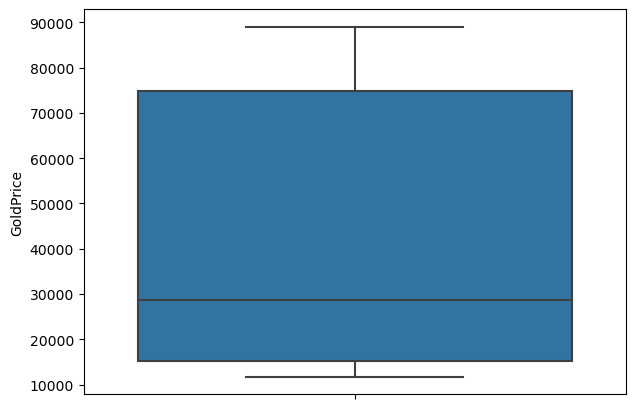

In [147]:
plt.figure(figsize=(7, 5))
sns.boxplot( y='GoldPrice', data=gs_prices_yearwise)
plt.show()

In [62]:
gs_prices_yearwise

,GoldPrice,SilverPrice
Year,,
97,11762.730,171.390
98,12256.355,223.890
99,12105.220,226.460
00,12528.280,224.930
01,12740.310,206.815
02,15294.540,222.645
03,16925.465,226.825
04,18445.075,303.490
05,18865.035,314.490


In [86]:
sns.scatterplot(y=['GoldPrice'], x='Year', data=gs_prices_yearwise)

plt.show()

sns.scatterplot(y=['SilverPrice'], x='Year', data=gs_prices_yearwise)

plt.show()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 21 and the vector passed to `y` has length 1.

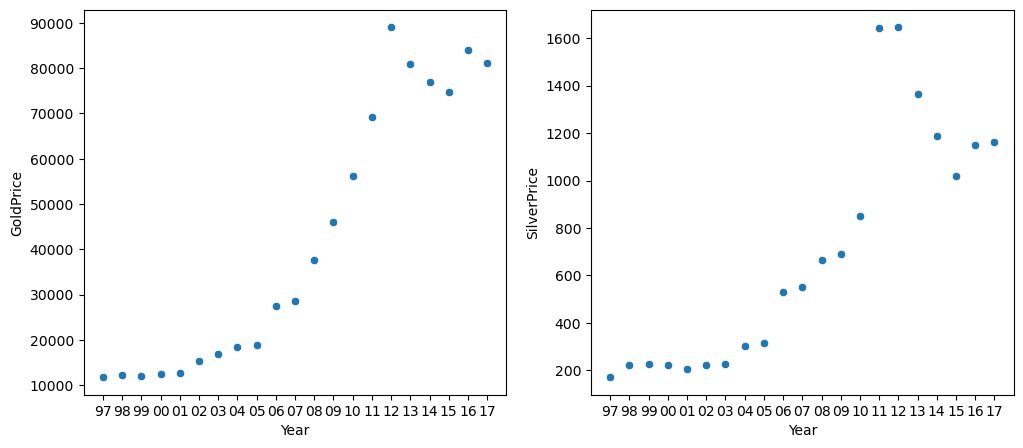

In [79]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Year', y='GoldPrice', data=gs_prices_yearwise)

plt.subplot(1, 2, 2)
sns.scatterplot(x='Year', y='SilverPrice', data=gs_prices_yearwise)
plt.show()

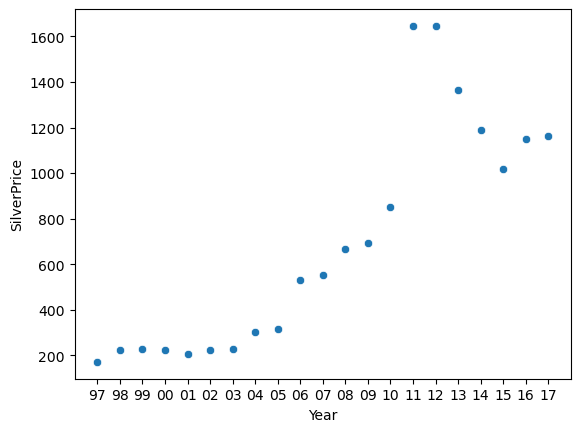

In [69]:
sns.scatterplot(x='Year', y='SilverPrice', data=gs_prices_yearwise)
plt.show()

In [88]:
gs_prices_yearwise.set()
gs_prices_yearwise

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 97 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GoldPrice    21 non-null     float64
 1   SilverPrice  21 non-null     float64
dtypes: float64(2)
memory usage: 1.0+ KB


,GoldPrice,SilverPrice
Year,,
97,11762.730,171.390
98,12256.355,223.890
99,12105.220,226.460
00,12528.280,224.930
01,12740.310,206.815
02,15294.540,222.645
03,16925.465,226.825
04,18445.075,303.490
05,18865.035,314.490


In [89]:
gs_prices.corr()

,SilverPrice,GoldPrice
SilverPrice,1.000000,0.954256
GoldPrice,0.954256,1.000000


D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


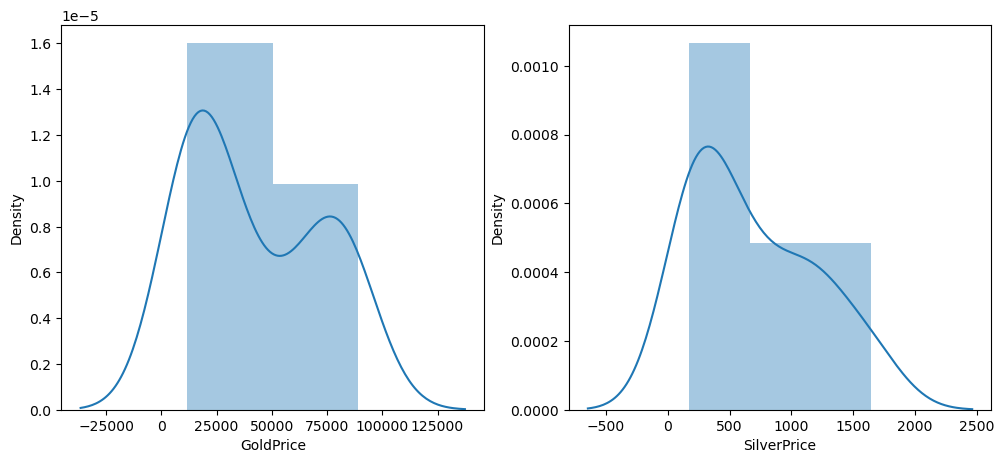

In [96]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.distplot(a=gs_prices_yearwise['GoldPrice'])

plt.subplot(1, 2, 2)

sns.distplot(a=gs_prices_yearwise['SilverPrice'])
plt.show()

In [101]:
gs_prices.isnull().sum()

Month          0
SilverPrice    0
GoldPrice      0
Year           0
dtype: int64

In [113]:
gs_prices['Month']= pd.to_datetime(gs_prices['Month'], format="%B, %y")
gs_prices['Month']

0     1997-03-01
1     1997-04-01
2     1997-05-01
3     1997-06-01
4     1997-07-01
         ...    
236   2016-11-01
237   2016-12-01
238   2017-01-01
239   2017-02-01
240   2017-03-01
Name: Month, Length: 241, dtype: datetime64[ns]

In [148]:
gs_prices.corr()

,SilverPrice,GoldPrice
SilverPrice,1.000000,0.954256
GoldPrice,0.954256,1.000000


In [151]:
gs_prices_for_2008 = gs_prices[ gs_prices['Year'] == '08'] # gs_prices['Month2'].dt.year=2008
gs_prices_for_2008

,Month,SilverPrice,GoldPrice,Month2,Year
130,Jan-08,632.29,35025.78,2008-01-01,08
131,Feb-08,701.87,36642.46,2008-02-01,08
132,Mar-08,775.49,39082.77,2008-03-01,08
133,Apr-08,700.96,36416.00,2008-04-01,08
134,May-08,718.20,37435.38,2008-05-01,08
135,Jun-08,729.63,38087.88,2008-06-01,08
136,Jul-08,773.80,40256.56,2008-07-01,08
137,Aug-08,625.97,36026.85,2008-08-01,08
138,Sep-08,555.58,37815.02,2008-09-01,08
139,Oct-08,507.20,39235.79,2008-10-01,08


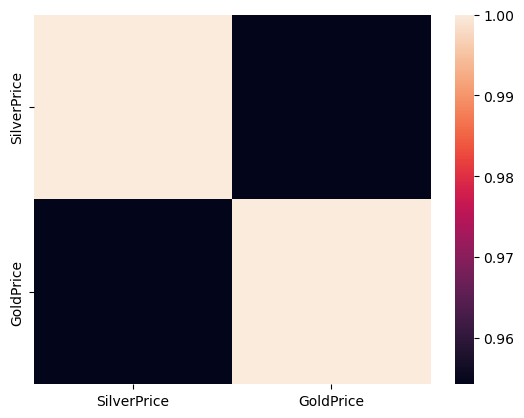

In [159]:
gs_prices.groupby('Year').corr()
sns.heatmap(gs_prices.corr())
plt.show()

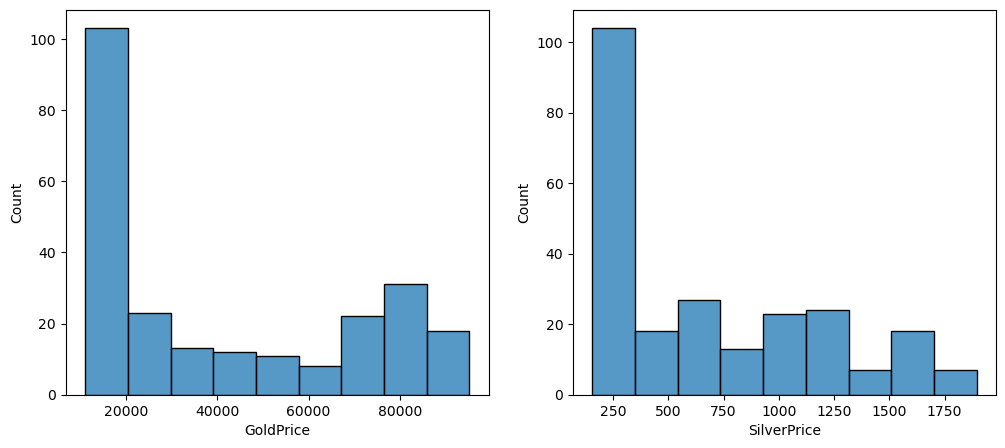

In [164]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data= gs_prices['GoldPrice'])


plt.subplot(1, 2, 2)
sns.histplot(data= gs_prices['SilverPrice'])
plt.show()

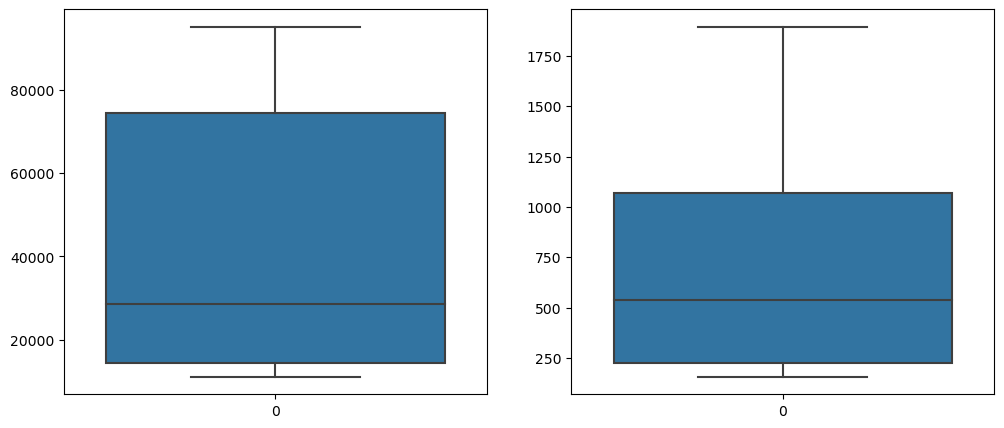

In [165]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data= gs_prices['GoldPrice'])

plt.subplot(1, 2, 2)
sns.boxplot(data= gs_prices['SilverPrice'])
plt.show()

In [166]:
gs_prices.describe()

,SilverPrice,GoldPrice
count,241.000000,241.000000
mean,685.282282,41180.102697
std,498.538816,28935.099175
min,155.800000,11084.770000
25%,226.610000,14388.340000
50%,537.930000,28636.080000
75%,1070.970000,74476.640000
max,1895.060000,95194.240000


In [173]:
gs_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        241 non-null    object        
 1   SilverPrice  241 non-null    float64       
 2   GoldPrice    241 non-null    float64       
 3   Month2       241 non-null    datetime64[ns]
 4   Year         241 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 9.5+ KB


In [176]:
gs_prices['Year2'] = gs_prices['Month2'].dt.year
gs_prices['Year2']

0      1997
1      1997
2      1997
3      1997
4      1997
       ... 
236    2016
237    2016
238    2017
239    2017
240    2017
Name: Year2, Length: 241, dtype: int64

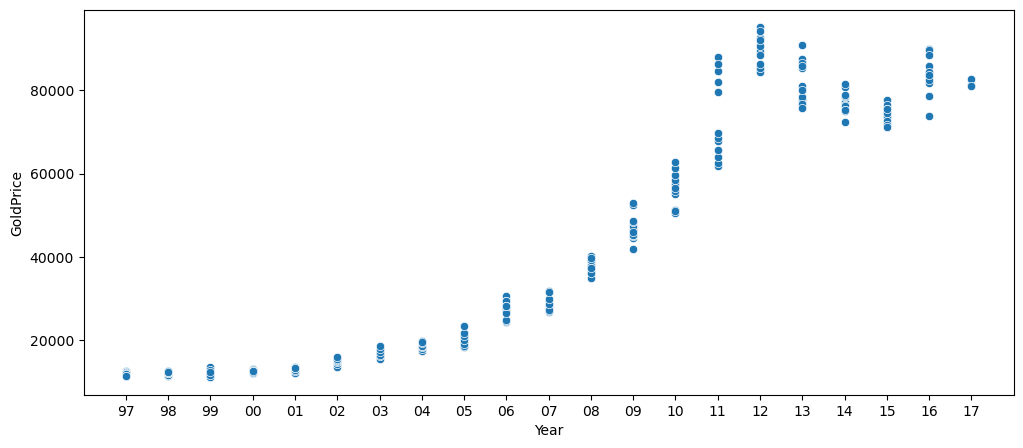

In [180]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x='Year', y='GoldPrice', data=gs_prices)
plt.show()

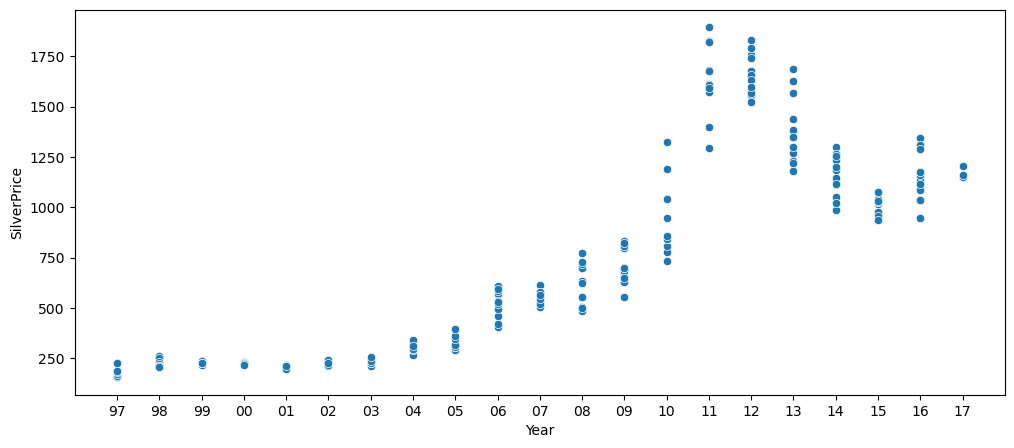

In [181]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x='Year', y='SilverPrice', data=gs_prices)
plt.show()

In [183]:
currencies = pd.read_csv('./data/currencies.csv')
currencies.head()

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909


In [184]:
currencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Currency                    11 non-null     object 
 1   Chinese Yuan                11 non-null     float64
 2   Euro                        11 non-null     float64
 3   Japanese Yen                10 non-null     float64
 4   U.K. Pound Sterling         11 non-null     float64
 5   U.S. Dollar                 11 non-null     float64
 6   Algerian Dinar              9 non-null      float64
 7   Australian Dollar           11 non-null     float64
 8   Bahrain Dinar               11 non-null     float64
 9   Botswana Pula               9 non-null      float64
 10  Brazilian Real              11 non-null     float64
 11  Brunei Dollar               10 non-null     float64
 12  Canadian Dollar             10 non-null     float64
 13  Chilean Peso                11 non-nu

In [195]:
currencies.head(10)

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909
5,"July 11, 2016",9.29403,1.25769,139.962,1.07050,1.38962,153.742,1.83836,0.522496,15.0067,...,20.0773,201.842,11.9439,1.36641,48.7950,9.23745,3.07068,5.10337,NaN,13.8614
6,"July 12, 2016",9.31021,1.25490,143.369,1.05762,1.39194,153.869,1.83439,0.523368,14.9510,...,19.9238,202.179,11.8614,1.36674,48.9182,9.28617,3.07901,5.11187,NaN,13.8845
7,"July 13, 2016",9.31350,1.25716,145.178,1.04680,1.39193,153.855,1.83101,0.523366,14.9509,...,19.9273,202.175,11.9234,1.37063,48.9958,9.29005,3.06884,5.11187,42.1644,13.8845
8,"July 14, 2016",9.30432,1.24695,144.895,1.05236,1.39122,153.763,1.82791,0.523097,14.9112,...,19.8519,202.074,11.8098,1.36326,48.8873,9.29990,NaN,5.10926,NaN,13.8774
9,"July 15, 2016",9.31532,1.25263,147.268,1.04242,1.39392,NaN,1.82786,0.524115,14.9723,...,20.0040,202.467,11.8409,1.36451,48.7607,9.31437,NaN,5.11917,42.0267,13.9044


In [194]:
currencies.isnull().sum(axis=1)

0      8
1      5
2     14
3      7
4      5
5      3
6      6
7      1
8      4
9      5
10     5
dtype: int64

In [204]:
corr= currencies.corr()
corr['Indian Rupee'].sort_values(ascending=False)

Indian Rupee                  1.000000
Pakistani Rupee               0.991673
Kuwaiti Dinar                 0.931099
Botswana Pula                 0.930798
Algerian Dinar                0.923232
Australian Dollar             0.921475
Nepalese Rupee                0.897655
South African Rand            0.897567
Nuevo Sol                     0.877833
Bahrain Dinar                 0.873195
Bolivar Fuerte                0.873170
Rial Omani                    0.873151
Saudi Arabian Riyal           0.873101
Qatar Riyal                   0.873075
U.S. Dollar                   0.872862
U.A.E. Dirham                 0.872859
Sri Lanka Rupee               0.872443
Thai Baht                     0.868087
Malaysian Ringgit             0.840498
Mauritian Rupee               0.835943
Icelandic Krona               0.825889
Brunei Dollar                 0.798249
Singapore Dollar              0.798249
Russian Ruble                 0.790276
Peso Uruguayo                 0.758479
Hungarian Forint         

In [210]:
corr['Japanese Yen'].sort_values() # -0.9708 vs UK Pond Sterling
corr['Australian Dollar'].sort_values() # vs. Tunisian Dinar  -0.677335Japanese Yen
corr['Chinese Yuan'].sort_values() # vs. Kazakhstani Tenge            -0.349278

Kazakhstani Tenge            -0.349278
Canadian Dollar              -0.186643
Icelandic Krona              -0.094406
Swiss Franc                  -0.069368
Nepalese Rupee               -0.048039
Swedish Krona                -0.044773
Czech Koruna                 -0.000742
Norwegian Krone               0.011336
Chilean Peso                  0.028821
Kuwaiti Dinar                 0.051050
Australian Dollar             0.077983
Hungarian Forint              0.092517
U.K. Pound Sterling           0.108695
Japanese Yen                  0.117566
Euro                          0.151596
New Zealand Dollar            0.158424
Philippine Peso               0.161906
Russian Ruble                 0.184050
Danish Krone                  0.190088
Trinidad And Tobago Dollar    0.215925
Malaysian Ringgit             0.235758
Mauritian Rupee               0.273543
Saudi Arabian Riyal           0.291155
U.A.E. Dirham                 0.291300
U.S. Dollar                   0.291582
Qatar Riyal              

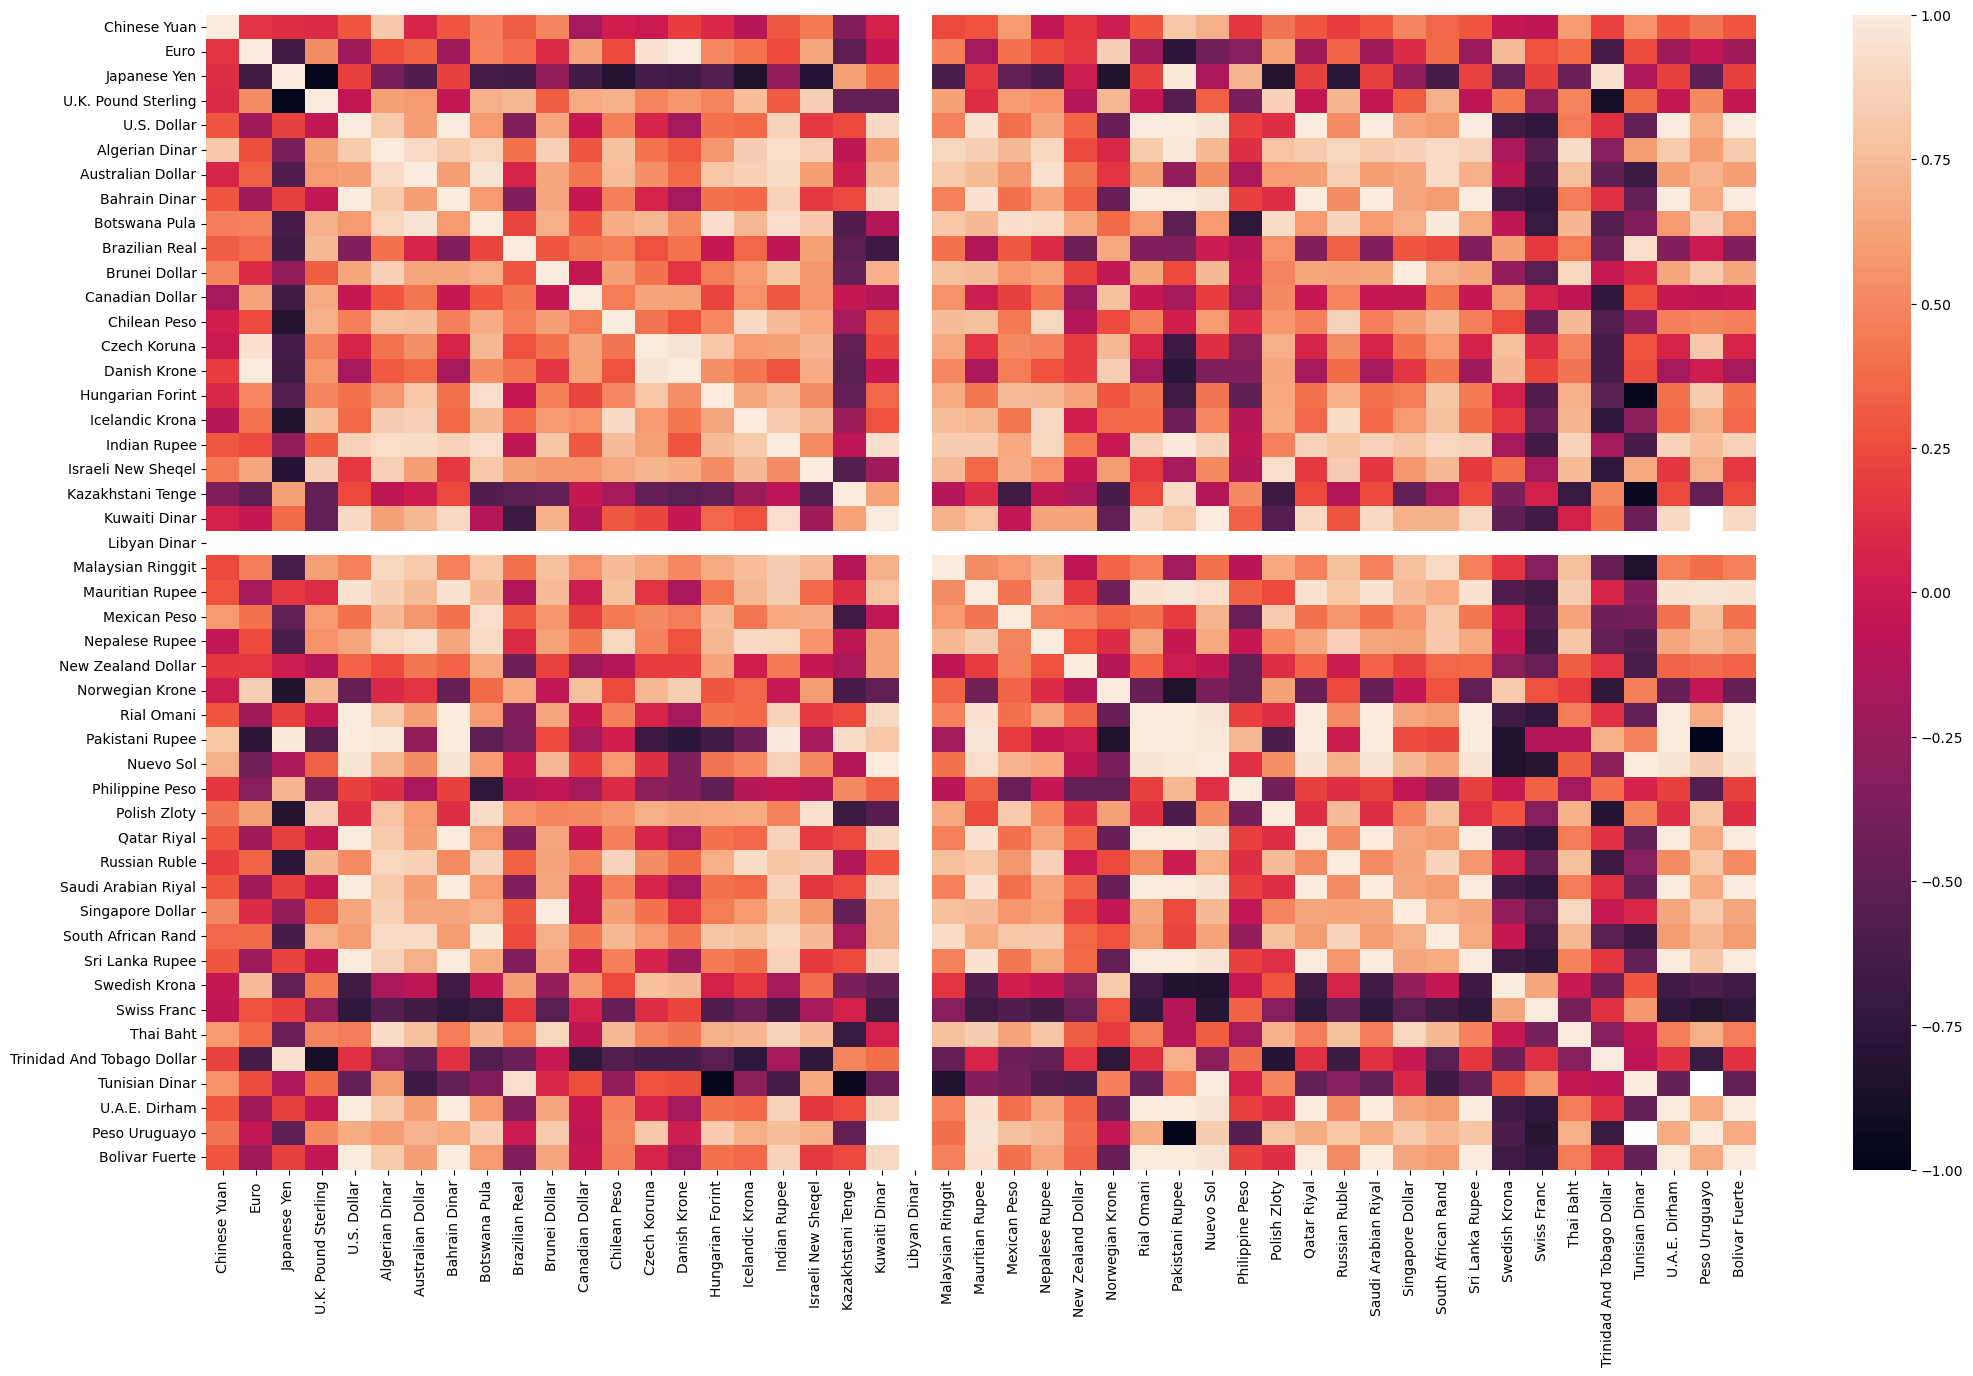

In [197]:
plt.figure(figsize=(25, 15))
sns.heatmap(corr)
plt.show()